<a href="https://colab.research.google.com/github/sureshkuc/Data-Science-in-Life-Science-Project/blob/main/DSiLS_Sw_Project(China_Dataset)_by_Suresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install PyGithub
import pandas as pd
import requests
import io
import numpy as np  
from datetime import date, timedelta
import re
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#from github import Github
import github
import torch
import torch.nn as nn
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader
# Import nn.functional
import torch.nn.functional as F
import torch.optim as optim
from typing import Union, Tuple
import os
import sys
import time
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
#from sklearn.metrics import mean_absolute_percentage_error
matplotlib.style.use('seaborn')
%matplotlib inline



     |████████████████████████████████| 296kB 3.9MB/s 
     |████████████████████████████████| 962kB 19.1MB/s 


In [ ]:
url=	'https://raw.githubusercontent.com/sureshkuc/Data-Science-in-Life-Science-Project/main/China-Dataset/City_Confirmed_20200115_20210114.csv'
#download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(url)
df.head()    

,City_EN,FID,Field_1,GbCity,GbProv,Prov_EN,N_C_200115,N_C_200116,N_C_200117,N_C_200118,N_C_200119,N_C_200120,N_C_200121,N_C_200122,N_C_200123,N_C_200124,N_C_200125,N_C_200126,N_C_200127,N_C_200128,N_C_200129,N_C_200130,N_C_200131,N_C_200201,N_C_200202,N_C_200203,N_C_200204,N_C_200205,N_C_200206,N_C_200207,N_C_200208,N_C_200209,N_C_200210,N_C_200211,N_C_200212,N_C_200213,N_C_200214,N_C_200215,N_C_200216,N_C_200217,...,T_C_201206,T_C_201207,T_C_201208,T_C_201209,T_C_201210,T_C_201211,T_C_201212,T_C_201213,T_C_201214,T_C_201215,T_C_201216,T_C_201217,T_C_201218,T_C_201219,T_C_201220,T_C_201221,T_C_201222,T_C_201223,T_C_201224,T_C_201225,T_C_201226,T_C_201227,T_C_201228,T_C_201229,T_C_201230,T_C_201231,T_C_210101,T_C_210102,T_C_210103,T_C_210104,T_C_210105,T_C_210106,T_C_210107,T_C_210108,T_C_210109,T_C_210110,T_C_210111,T_C_210112,T_C_210113,T_C_210114
0,Beijing,0,24,1100,11,Beijing,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,8.0,14.0,5.0,27.0,12.0,11.0,23.0,18.0,24.0,27.0,29.0,16.0,25.0,21.0,23.0,18.0,11.0,11.0,5.0,10.0,14.0,6.0,3.0,5.0,1.0,6.0,...,952.0,952.0,952.0,952.0,952.0,952.0,954.0,955.0,956.0,957.0,957.0,957.0,959.0,961.0,961.0,961.0,961.0,961.0,961.0,963.0,971.0,972.0,979.0,980.0,982.0,987.0,988.0,990.0,992.0,993.0,994.0,994.0,995.0,995.0,996.0,997.0,998.0,998.0,999.0,999.0
1,Tianjin,1,245,1200,12,Tianjin,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,4.0,9.0,1.0,3.0,4.0,1.0,9.0,7.0,12.0,7.0,2.0,10.0,2.0,7.0,3.0,4.0,11.0,6.0,7.0,1.0,2.0,2.0,1.0,...,301.0,301.0,301.0,301.0,301.0,302.0,302.0,302.0,302.0,303.0,303.0,303.0,304.0,304.0,304.0,304.0,304.0,304.0,304.0,304.0,304.0,305.0,306.0,309.0,309.0,309.0,312.0,313.0,314.0,315.0,316.0,316.0,316.0,316.0,320.0,322.0,324.0,324.0,324.0,324.0
2,Shijiazhuang,2,228,1301,13,Hebei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,5.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,30.0,43.0,62.0,112.0,143.0,157.0,201.0,278.0,317.0,401.0,476.0,560.0
3,Tangshan,3,244,1302,13,Hebei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,3.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,1.0,3.0,2.0,2.0,8.0,3.0,5.0,0.0,0.0,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
4,Qinhuangdao,4,201,1303,13,Hebei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [ ]:
df=df.drop(columns=['Prov_EN','GbProv','GbCity','FID',	'Field_1'])

In [ ]:
df=df.loc[df['City_EN'].isin(['Wuhan','Huanggang','Xiaogan','Ezhou','Yichang','Wenzhou','Shenzhen'])]

In [ ]:
df.set_index('City_EN')

,N_C_200115,N_C_200116,N_C_200117,N_C_200118,N_C_200119,N_C_200120,N_C_200121,N_C_200122,N_C_200123,N_C_200124,N_C_200125,N_C_200126,N_C_200127,N_C_200128,N_C_200129,N_C_200130,N_C_200131,N_C_200201,N_C_200202,N_C_200203,N_C_200204,N_C_200205,N_C_200206,N_C_200207,N_C_200208,N_C_200209,N_C_200210,N_C_200211,N_C_200212,N_C_200213,N_C_200214,N_C_200215,N_C_200216,N_C_200217,N_C_200218,N_C_200219,N_C_200220,N_C_200221,N_C_200222,N_C_200223,...,T_C_201206,T_C_201207,T_C_201208,T_C_201209,T_C_201210,T_C_201211,T_C_201212,T_C_201213,T_C_201214,T_C_201215,T_C_201216,T_C_201217,T_C_201218,T_C_201219,T_C_201220,T_C_201221,T_C_201222,T_C_201223,T_C_201224,T_C_201225,T_C_201226,T_C_201227,T_C_201228,T_C_201229,T_C_201230,T_C_201231,T_C_210101,T_C_210102,T_C_210103,T_C_210104,T_C_210105,T_C_210106,T_C_210107,T_C_210108,T_C_210109,T_C_210110,T_C_210111,T_C_210112,T_C_210113,T_C_210114
City_EN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Wenzhou,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,-3.0,9.0,8.0,14.0,28.0,54.0,58.0,55.0,-55.0,93.0,26.0,49.0,24.0,32.0,25.0,17.0,10.0,16.0,10.0,7.0,9.0,6.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0,504.0
Wuhan,0.0,1.0,17.0,59.0,77.0,60.0,107.0,60.0,70.0,77.0,46.0,80.0,892.0,315.0,356.0,378.0,576.0,894.0,1033.0,1242.0,1967.0,1766.0,1501.0,1985.0,1379.0,1920.0,1552.0,1104.0,13436.0,2997.0,1923.0,1548.0,1690.0,1600.0,1660.0,615.0,319.0,0.0,314.0,541.0,...,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0,50340.0
Yichang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,11.0,20.0,12.0,54.0,50.0,109.0,77.0,39.0,60.0,44.0,67.0,47.0,23.0,78.0,38.0,23.0,12.0,26.0,67.0,29.0,-5.0,-6.0,9.0,3.0,-16.0,4.0,19.0,0.0,3.0,...,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0,931.0
Ezhou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,20.0,37.0,27.0,39.0,66.0,38.0,51.0,28.0,26.0,50.0,41.0,48.0,98.0,70.0,86.0,65.0,71.0,204.0,60.0,67.0,38.0,44.0,65.0,4.0,-5.0,5.0,30.0,2.0,4.0,...,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0,1394.0
Xiaogan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,4.0,29.0,45.0,73.0,101.0,125.0,142.0,87.0,121.0,169.0,202.0,342.0,424.0,255.0,172.0,123.0,105.0,101.0,109.0,123.0,135.0,105.0,87.0,78.0,41.0,24.0,-15.0,17.0,81.0,2.0,14.0,...,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0
Huanggang,0.0,0.0,0.0,0.0,0.0,12.0,-12.0,12.0,0.0,52.0,58.0,32.0,59.0,111.0,172.0,77.0,153.0,276.0,244.0,176.0,223.0,162.0,90.0,144.0,100.0,111.0,80.0,66.0,264.0,129.0,26.0,6.0,8.0,-3.0,16.0,-5.0,17.0,27.0,16.0,5.0,...,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0,2907.0
Shenzhen,0.0,0.0,0.0,0.0,1.0,8.0,5.0,1.0,0.0,5.0,7.0,9.0,13.0,14.0,23.0,24.0,60.0,26.0,30.0,43.0,20.0,25.0,2

In [ ]:
df=df.T

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
df

City_EN,Wenzhou,Wuhan,Yichang,Ezhou,Xiaogan,Huanggang,Shenzhen
N_C_200115,0,0,0,0,0,0,0
N_C_200116,0,1,0,0,0,0,0
N_C_200117,0,17,0,0,0,0,0
N_C_200118,0,59,0,0,0,0,0
N_C_200119,0,77,0,0,0,0,1
...,...,...,...,...,...,...,...
T_C_210110,504,50340,931,1394,3518,2907,484
T_C_210111,504,50340,931,1394,3518,2907,484
T_C_210112,504,50340,931,1394,3518,2907,485
T_C_210113,504,50340,931,1394,3518,2907,485


In [ ]:
df_1 = df.iloc[:366,:]
df_2 = df.iloc[366:,:]

In [ ]:
df_1=df_1.reset_index()
df_2=df_2.reset_index()
df_2.columns=['date','We_t','Wu_t','Y_t','E_t','X_t','H_t','S_t']
df3=pd.concat([df_1,df_2], axis=1)


In [ ]:
dataset=df3[8:48]

In [ ]:
dataset

,index,Wenzhou,Wuhan,Yichang,Ezhou,Xiaogan,Huanggang,Shenzhen,date,We_t,Wu_t,Y_t,E_t,X_t,H_t,S_t
8,N_C_200123,-3,70,1,0,22,0,0,T_C_200123,1,495,1,0,22,12,15
9,N_C_200124,9,77,0,1,4,52,5,T_C_200124,10,572,1,1,26,64,20
10,N_C_200125,8,46,19,-1,29,58,7,T_C_200125,18,618,20,0,55,122,27
11,N_C_200126,14,80,11,20,45,32,9,T_C_200126,32,698,31,20,100,154,36
12,N_C_200127,28,892,20,37,73,59,13,T_C_200127,60,1590,51,57,173,213,49
13,N_C_200128,54,315,12,27,101,111,14,T_C_200128,114,1905,63,84,274,324,63
14,N_C_200129,58,356,54,39,125,172,23,T_C_200129,172,2261,117,123,399,496,86
15,N_C_200130,55,378,50,66,142,77,24,T_C_200130,227,2639,167,189,541,573,110
16,N_C_200131,-55,576,109,38,87,153,60,T_C_200131,172,3215,276,227,628,726,170
17,N_C_200201,93,894,77,51,121,276,26,T_C_200201,265,4109,353,278,749,1002,196


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1, response_variable_index=0, multi_feature = True):
  dataX, dataY = [], []
  if multi_feature :
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back)]
      dataX.append(a)
      dataY.append(dataset[i + look_back, response_variable_index])
  else:
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back),response_variable_index]
      dataX.append(a)
      dataY.append(dataset[i + look_back, response_variable_index])
  return np.array(dataX), np.array(dataY)

In [ ]:
def data_preparation(df, scaling_range=(0,1),time_step=5,multi_feature=True, response_variable_index=3,data_split_ratio=0.8):
    df = df.astype('float32')
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=scaling_range)
    dataset = scaler.fit_transform(df)
    X, Y = create_dataset(dataset, time_step,response_variable_index=response_variable_index, multi_feature=multi_feature)
    # split into train and test sets
    train_size = int(len(dataset) * data_split_ratio)
    test_size = len(dataset) - train_size
    trainX, testX = X[0:train_size,:], X[train_size:len(dataset),:]
    trainY, testY = Y[0:train_size], Y[train_size:len(dataset)]
    print(trainX.shape)
    # reshape input to be [samples, time steps, features]
    if not multi_feature:
      trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
      testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))
    #print(trainX.shape)
    X_train=trainX
    X_test=testX
    y_train=trainY.reshape(-1,1)

    print(X_train.shape, y_train.shape)
    # summarize the data
    inputs = torch.from_numpy(X_train)
    targets = torch.from_numpy(y_train)
    # Define dataset
    train_ds = TensorDataset(inputs, targets)

    batch_size = 16
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False)

    y_test=testY.reshape(-1,1)

    inputs = torch.from_numpy(X_test)
    targets = torch.from_numpy(y_test)
    # Define dataset
    test_ds = TensorDataset(inputs, targets)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader, scaler

In [ ]:
class Flatten(nn.Module):
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x

class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()
  
    
    self.body = nn.Sequential(OrderedDict([
                                   ('conv1', nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)),
                                   ('relu1', nn.Tanh()),
                                   #('bn1', nn.BatchNorm1d(16)),
                                   #('pool1', nn.MaxPool1d(kernel_size=2, stride=2)),
                                   ('conv2', nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)),
                                   ('relu2', nn.Tanh()),
                                   #('bn2', nn.BatchNorm1d(32)),
                                   #('pool2', nn.MaxPool1d(kernel_size=2, stride=2)),
                                   ('conv3', nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)),
                                   ('relu3', nn.Tanh()),
                                   #('bn3', nn.BatchNorm1d(64)),
                                   #('pool3', nn.MaxPool1d(kernel_size=2, stride=2)),
                                   ('conv4', nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)),
                                   ('relu4', nn.LeakyReLU()),
                                   #('sigmoid4', nn.Sigmoid()),
                                   #('bn4', nn.BatchNorm1d(64)),
                                   #('pool4', nn.MaxPool1d(kernel_size=2, stride=2)),
                                   ('flatten',Flatten()),
                                   ('dropout',nn.Dropout(p=0.2)),
                                   #('pool4', nn.MaxPool2d(kernel_size=2, stride=2))
    ]))
    self.head = nn.Linear(320, 1)

  def forward(self, x):
    b, look_back, features = x.shape
    #print(b,n_steps, features)
    x = x.reshape([b,features, look_back])
    y = self.body(x)
    return self.head(y.reshape([-1, 320]))

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, hidden_dim,output_dim):
    super(MLP, self).__init__()
    self.input_dim=input_dim
    self.hidden_dim=hidden_dim
    self.output_dim=output_dim
    self.body = nn.Sequential(OrderedDict([
                                   ('fc1', nn.Linear(in_features=self.input_dim, out_features=self.hidden_dim)),
                                   ('sigmoid', nn.Sigmoid()),
                                   #('relu1', nn.ReLU()),
                                   #('bn1', nn.BatchNorm1d(num_features=self.hidden_dim)),
                                   ('fc2', nn.Linear(in_features=self.hidden_dim, out_features=self.output_dim)),
                                   ('sigmoid1', nn.Sigmoid()),
                                   #('relu2', nn.ReLU()),
                                   #('bn2', nn.BatchNorm1d(num_features=2)),
                                   #('fc3', nn.Linear(in_features=2, out_features=1)),
    ]))

  def forward(self, x):
    b, n_steps, features = x.shape
    #print(b,n_steps, features)
    x = x.reshape([b, n_steps*features])
    return self.body(x)

In [ ]:
def fit(
    model: nn.Module, 
    optimizer: optim.Optimizer, criterion: nn,
    data: Union[DataLoader, Tuple[DataLoader]], 
    max_epochs: int, 
    cuda=True):
  use_test = False
  if isinstance(data, DataLoader):
    train_loader = data
  elif isinstance(data, tuple):
    if len(data) == 2:
      train_loader, test_loader = data
      if not isinstance(train_loader, DataLoader):
        raise TypeError(f'Expected 1st entry of type DataLoader, but got {type(train_loader)}!')
      if not isinstance(test_loader, DataLoader):
        raise TypeError(f'Expected 2nd entry of type DataLoader, but got {type(test_loader)}!')
      use_test = True
    else:
      raise ValueError(f'Expected tuple of length 2, but got {len(data)}!')
  
  
  #criterion = nn.L1Loss()
  model.train()
  losses = []
  test_losses=[]
  batch_total = len(train_loader)
  best_model=None
  min_loss=np.iinfo(0).max
  for epoch in range(max_epochs):

    running_loss=[]
    test_loss=[]
    for batch_idx, batch in enumerate(train_loader):
      x, y = batch
      if cuda:
        x, y = x.cuda(), y.cuda()
      output = model(x)
      loss = criterion(output, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      running_loss.append(loss.item())
      #rmse += torch.sqrt(criterion(yhat, y))
      #losses.append(loss.item())
      
    if use_test:
      model.eval()
      for test_x, test_y in test_loader:
        if cuda:
          test_x, test_y = test_x.cuda(), test_y.cuda()
        test_output = model(test_x)
        loss = criterion(test_output, test_y)
        test_loss.append(loss.item())
        #test_mae = criterion(test_output, test_y)
      epoch_loss = mean(test_loss)
      if epoch_loss<min_loss:
        min_loss = epoch_loss
        best_model= model.state_dict()
      test_losses.append(epoch_loss)
      model.train()
      if epoch%50==0:
        sys.stdout.write(f'\rEpoch: {epoch}/{max_epochs}  Loss: {mean(running_loss):.6f} Test loss: {epoch_loss:.6f}')
    else:
      sys.stdout.write(f'\rEpoch: {epoch}/{max_epochs}  Loss: {running_loss:.6f}' )
    epoch_loss =mean(running_loss)
    losses.append(epoch_loss)
  return (losses, test_losses, best_model)

In [ ]:
def predict(model: nn.Module, data: DataLoader, cuda=True):
  predictions=None
  model.eval()
  for id,(x, y) in enumerate(data):
      if id==0:
        predictions=model(x)
      else:
        output = model(x)
        predictions=torch.vstack((predictions,output))
  return predictions
def plot_predictions(model, data_loader):
  
  predictions=predict(model, data_loader)

  train_y = y_train

  test_y=y_test
  predictions=predictions.cpu()
  plt.plot(range(len(train_y)),train_y, label='train data')
  plt.plot(np.arange(len(train_y),len(train_y)+len(test_y),1),test_y,label='Acutal')
  plt.plot(np.arange(len(train_y),len(train_y)+len(test_y),1),predictions.detach().numpy(),label='predictions')
  plt.legend()
  
def plot_loss(epochs,train_losses,test_losses,model_name):
  plt.rcParams['figure.figsize'] = [10, 5]
  plt.rcParams['figure.dpi'] = 100
  plt.plot(range(epochs),train_losses, label='train loss')
  plt.plot(range(epochs),test_losses,label='test loss')
  plt.title(model_name)
  plt.legend()
  plt.show()

In [ ]:
def Call_CNN_model(state,dataset, lr=1e-2,criterion=nn.L1Loss(),max_epochs=100):
    start = time.time()
    CNN_model =  CNNModel()
    cuda=torch.cuda.is_available()
    if cuda:
      CNN_model = CNN_model.cuda()
    optimizer = optim.SGD(CNN_model.parameters(), lr=lr, momentum=0.9)
    train_losses,test_losses, best_model = fit(CNN_model, optimizer, criterion,dataset, max_epochs=max_epochs,cuda=cuda)
    end = time.time()
    print(f'\nTraining took {end-start}s!')
    plot_loss(max_epochs,train_losses,test_losses,model_name='CNN for '+state)
    CNN_model =  CNNModel()
    CNN_model.load_state_dict(best_model)
    #plot_predictions(CNN_model, test_loader)
    return CNN_model

In [ ]:
def Call_MLP_model(state, input_dim, hidden_dim, output_dim, dataset, lr=1e-2,criterion=nn.L1Loss(),max_epochs=100):
  start = time.time()
  fc_model = MLP(input_dim, hidden_dim,output_dim)
  cuda=torch.cuda.is_available()
  if cuda:
    fc_model = fc_model.cuda()
  fc_optim = optim.SGD(fc_model.parameters(), lr=lr, momentum=0.9)
  #fc_optim = optim.Adam(fc_model.parameters(), lr=1e-3)
  train_losses,test_losses,best_model = fit(fc_model, fc_optim,criterion, dataset, max_epochs=max_epochs,cuda=cuda)
  end = time.time()
  print(f'\nTraining took {end-start}s!')
  plot_loss(max_epochs,train_losses,test_losses,model_name='MLP for '+state)
  fc_model = MLP(input_dim, hidden_dim,output_dim)
  fc_model.load_state_dict(best_model)
  #plot_predictions(fc_model, test_loader)
  return fc_model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim,  output_dim,num_layers, seq_length):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        self.seq_length=seq_length
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.relu = nn.ReLU()
        # Readout layer
        print(output_dim)
        self.fc = nn.Linear(hidden_dim*self.seq_length, output_dim)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        x = out.contiguous().view(batch_size,-1)
        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(self.relu(x)) 
        # out.size() --> 100, 10
        return out
    


In [ ]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers,seq_length):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.seq_length=seq_length
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim*seq_length, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        weight = next(self.parameters()).data
        h = weight.new(self.n_layers, x.size(0), self.hidden_dim).zero_()
        out, h = self.gru(x, h)
        out = out.contiguous().view(batch_size,-1)
        out = self.fc(out)
        return out

In [ ]:
def Call_GRUNet_model(state, input_dim, hidden_dim, output_dim, num_layers, dataset, lr=1e-2,criterion=nn.L1Loss(),max_epochs=100,seq_length=5):
  start = time.time()
  
  GRUNet_model = GRUNet(input_dim, hidden_dim, output_dim, num_layers,seq_length)
  #if torch.cuda.is_available():
  #stm_model = lstm_model.cuda()
  print(GRUNet_model)
  gru_optim = optim.SGD(GRUNet_model.parameters(), lr=lr, momentum=0.9)
  #fc_optim = optim.Adam(model.parameters(), lr=1e-3)
  train_losses,test_losses,best_model = fit(GRUNet_model, gru_optim,criterion, (train_loader, test_loader), max_epochs=max_epochs,cuda=False)
  end = time.time()
  print(f'\nTraining took {end-start}s!')
  plot_loss(max_epochs,train_losses,test_losses,model_name='GRU for '+state)
  gru_model = GRUNet(input_dim, hidden_dim, output_dim, num_layers,seq_length)
  gru_model.load_state_dict(best_model)
  #plot_predictions(lstm_model, test_loader)
  return gru_model

In [ ]:
def Call_LSTM_model(state, input_dim, hidden_dim, output_dim, num_layers, dataset, lr=1e-2,criterion=nn.L1Loss(),max_epochs=100,seq_length=5):
  start = time.time()
  
  lstm_model = LSTM(input_dim, hidden_dim, output_dim, num_layers,seq_length)
  #if torch.cuda.is_available():
  #stm_model = lstm_model.cuda()
  print(lstm_model)
  lstm_optim = optim.SGD(lstm_model.parameters(), lr=lr, momentum=0.9)
  #fc_optim = optim.Adam(model.parameters(), lr=1e-3)
  train_losses,test_losses,best_model = fit(lstm_model, lstm_optim,criterion, (train_loader, test_loader), max_epochs=max_epochs,cuda=False)
  end = time.time()
  print(f'\nTraining took {end-start}s!')
  plot_loss(max_epochs,train_losses,test_losses,model_name='LSTM for '+state)
  lstm_model = LSTM(input_dim, hidden_dim, output_dim, num_layers,seq_length)
  lstm_model.load_state_dict(best_model)
  #plot_predictions(lstm_model, test_loader)
  return lstm_model

In [ ]:
def get_actual_values(model: nn.Module, data: DataLoader, cuda=True):
  Actual=None
  for id,(x, y) in enumerate(data):
      if id==0:
        Actual=y
      else:
        output = y
        Actual=torch.vstack((Actual,output))
  return Actual



(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.523801 Test loss: 0.924168
Training took 0.3487865924835205s!


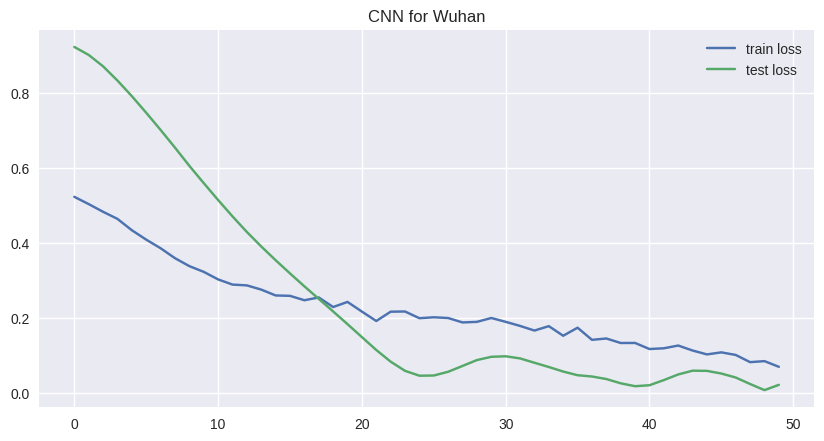

Epoch: 0/50  Loss: 0.418944 Test loss: 0.963287
Training took 0.40224266052246094s!


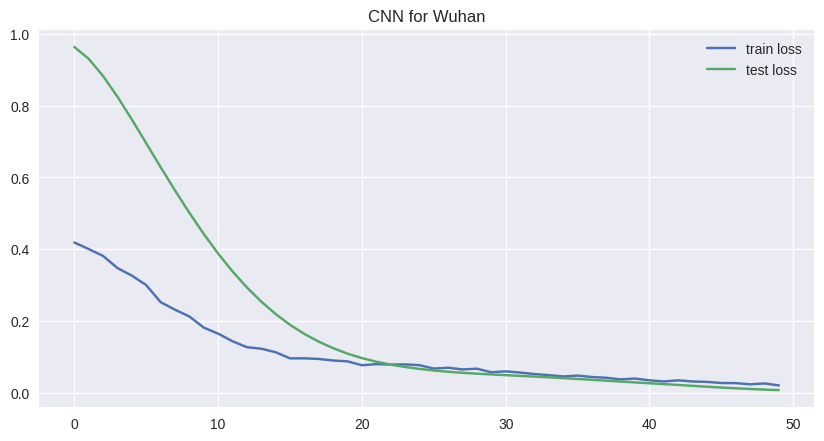

Epoch: 0/50  Loss: 0.336286 Test loss: 0.552722
Training took 0.10364389419555664s!


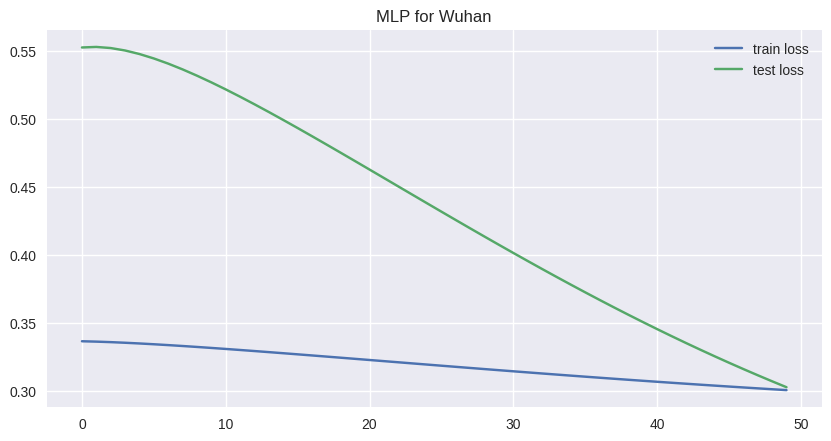

Epoch: 0/50  Loss: 0.121019 Test loss: 0.148027
Training took 0.11423611640930176s!


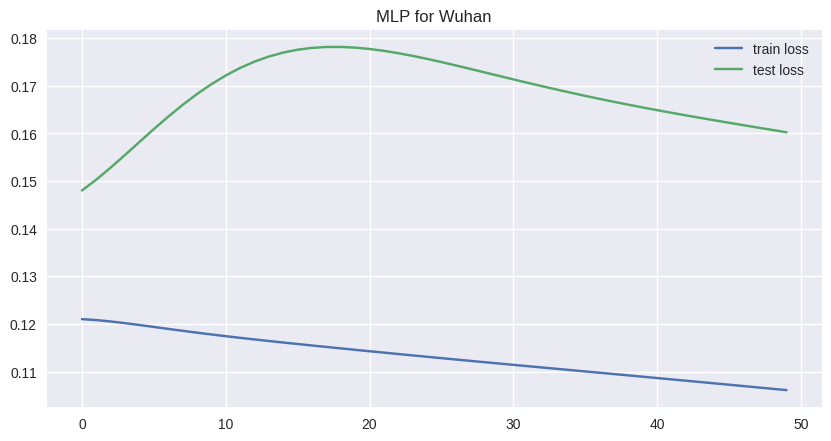

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.339805 Test loss: 0.562713
Training took 0.7550790309906006s!


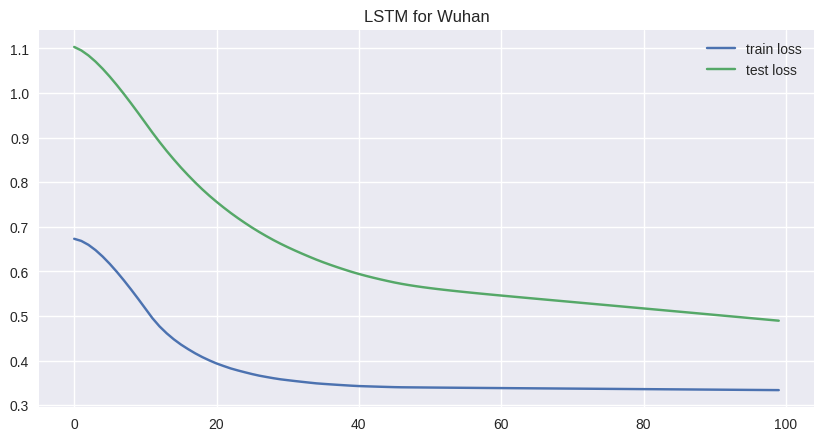

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.120323 Test loss: 0.190037
Training took 0.7396278381347656s!


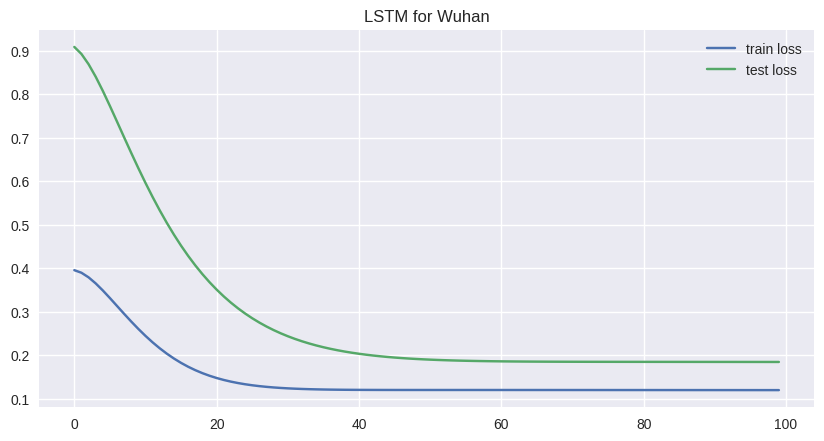

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.278710 Test loss: 0.195132
Training took 0.7783548831939697s!


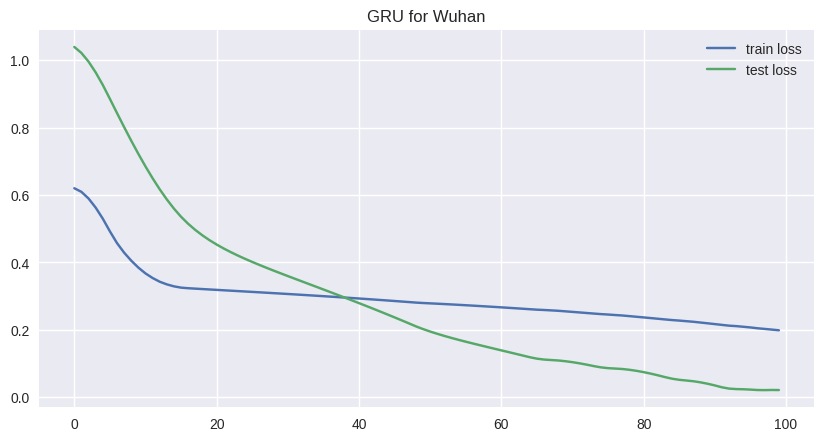

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.114489 Test loss: 0.167491
Training took 0.7765727043151855s!


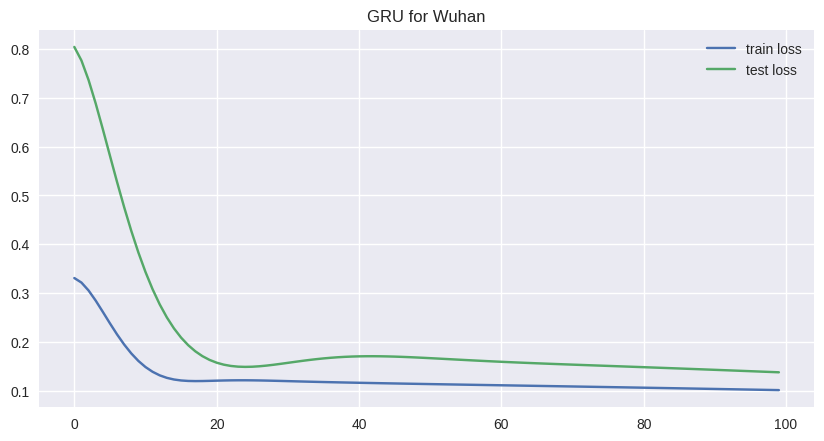

(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.783911 Test loss: 1.035955
Training took 0.3058629035949707s!


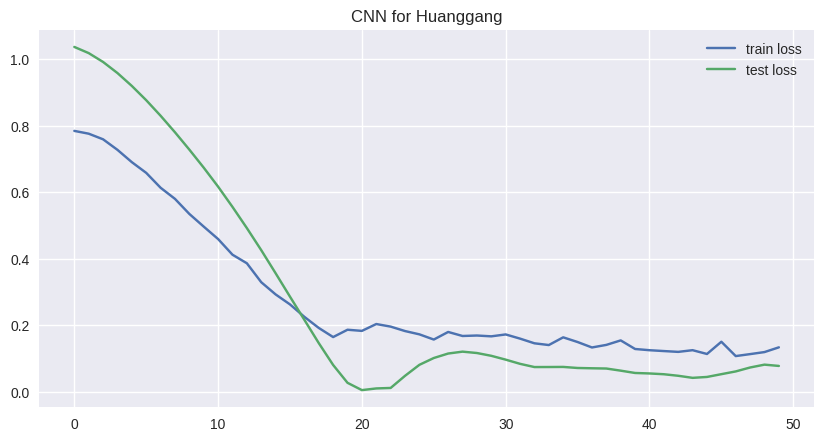

Epoch: 0/50  Loss: 0.555740 Test loss: 0.850745
Training took 0.31392955780029297s!


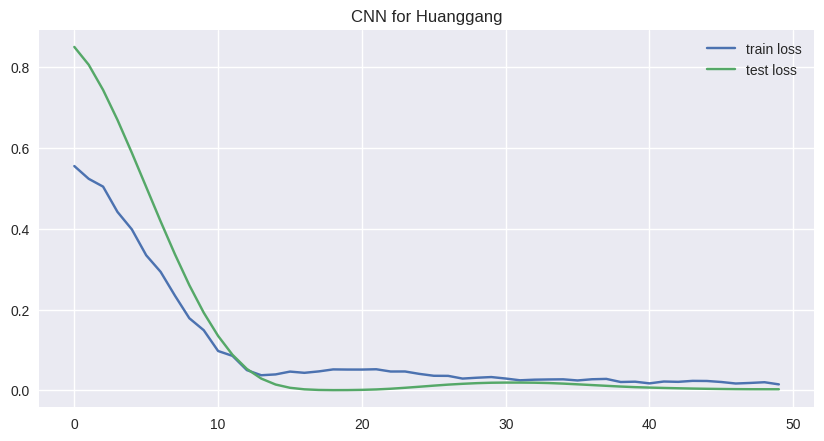

Epoch: 0/50  Loss: 0.366635 Test loss: 0.520059
Training took 0.10166406631469727s!


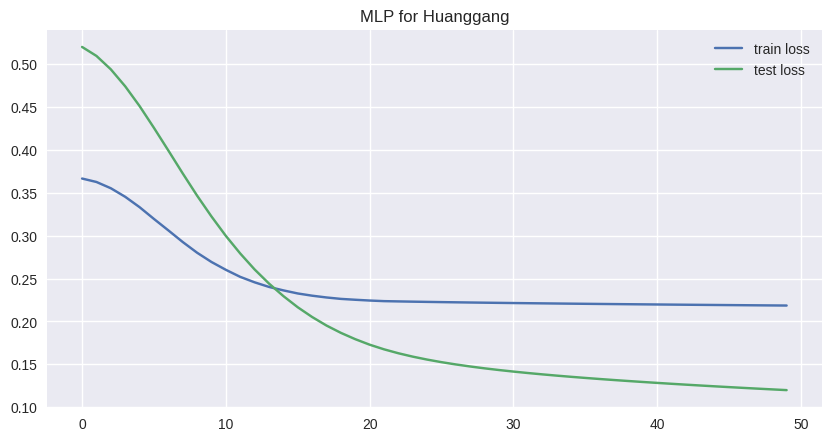

Epoch: 0/50  Loss: 0.096620 Test loss: 0.130549
Training took 0.09733796119689941s!


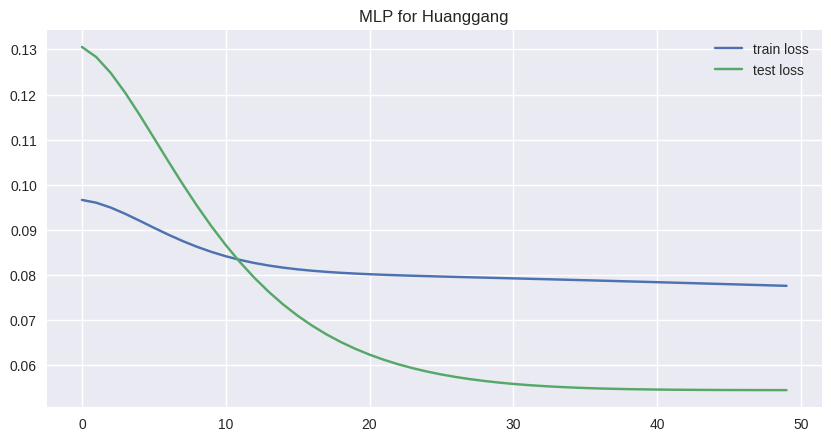

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.218471 Test loss: 0.149087
Training took 0.7698371410369873s!


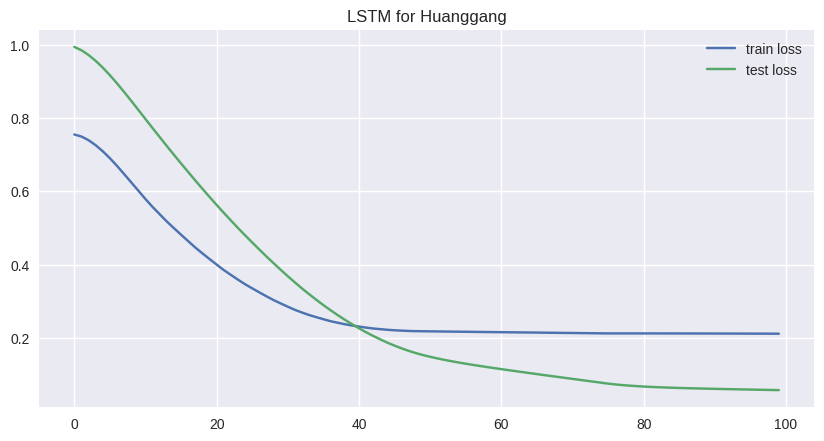

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.082586 Test loss: 0.064833
Training took 0.7545986175537109s!


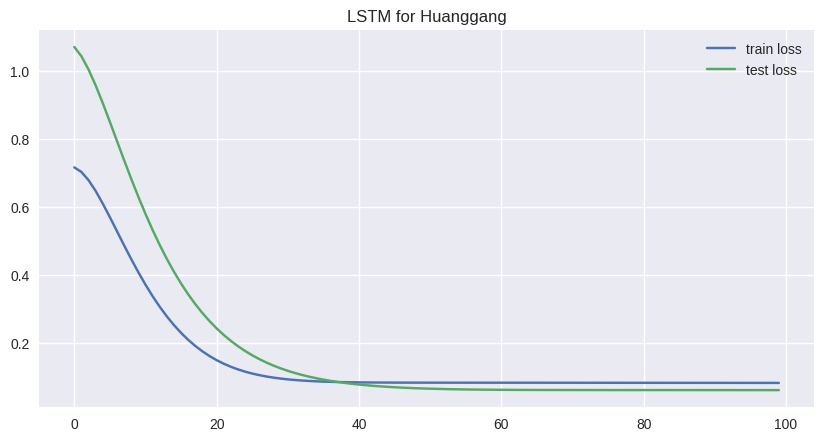

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.192312 Test loss: 0.020578
Training took 0.8160130977630615s!


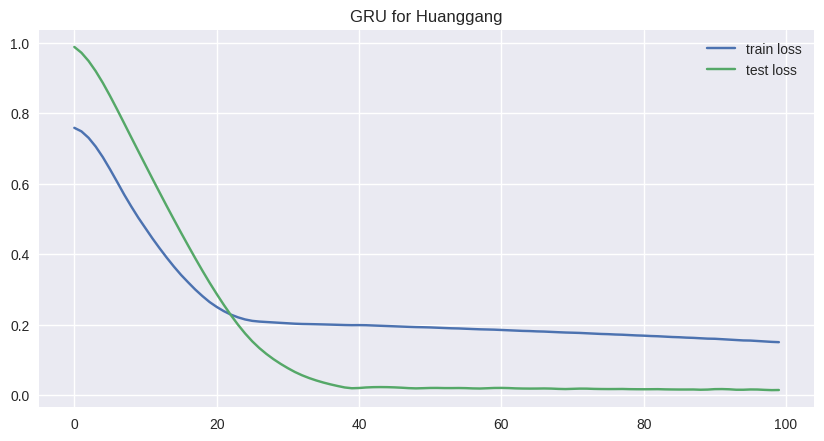

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.078347 Test loss: 0.059373
Training took 0.7565822601318359s!


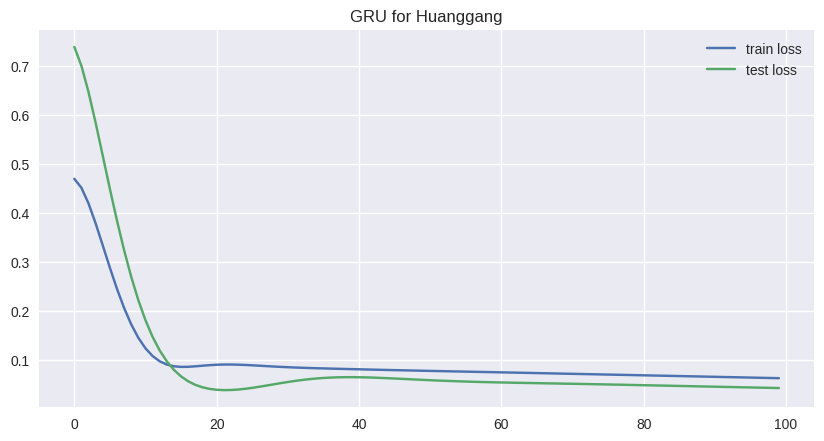

(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.679391 Test loss: 0.976668
Training took 0.329617977142334s!


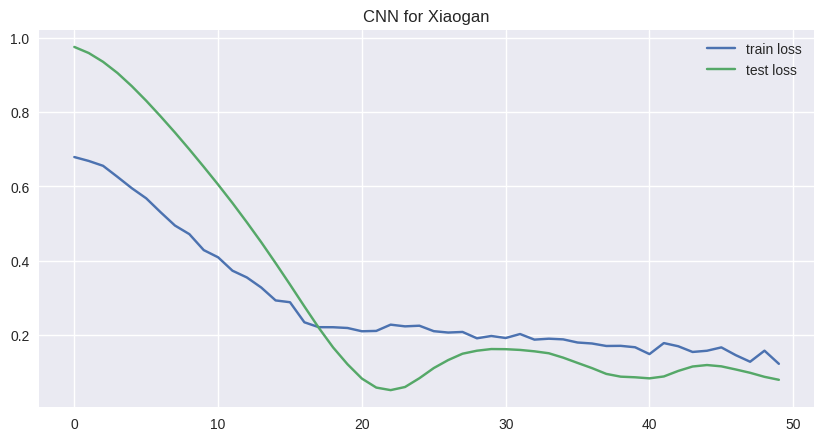

Epoch: 0/50  Loss: 0.705987 Test loss: 1.162008
Training took 0.33815455436706543s!


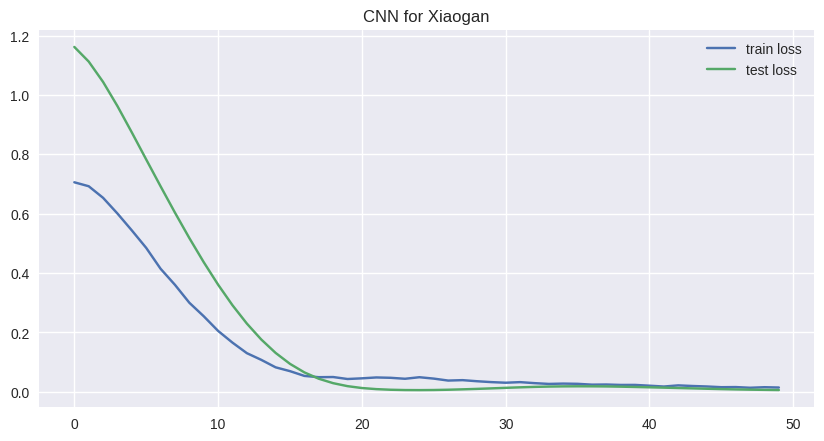

Epoch: 0/50  Loss: 0.335551 Test loss: 0.488694
Training took 0.11608648300170898s!


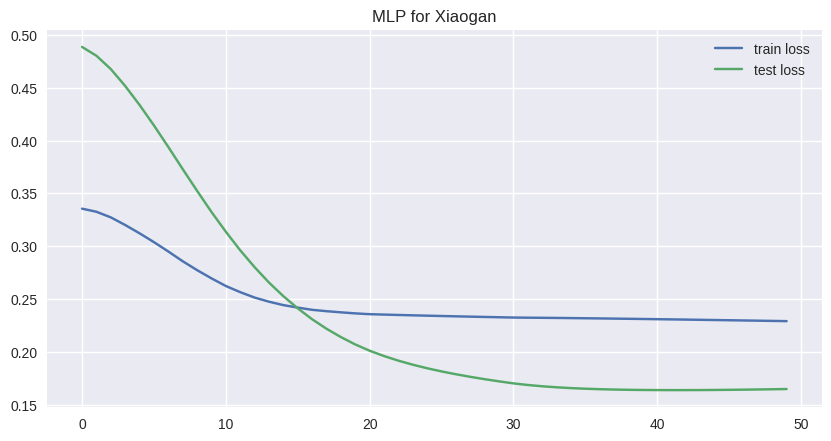

Epoch: 0/50  Loss: 0.127323 Test loss: 0.237698
Training took 0.10409855842590332s!


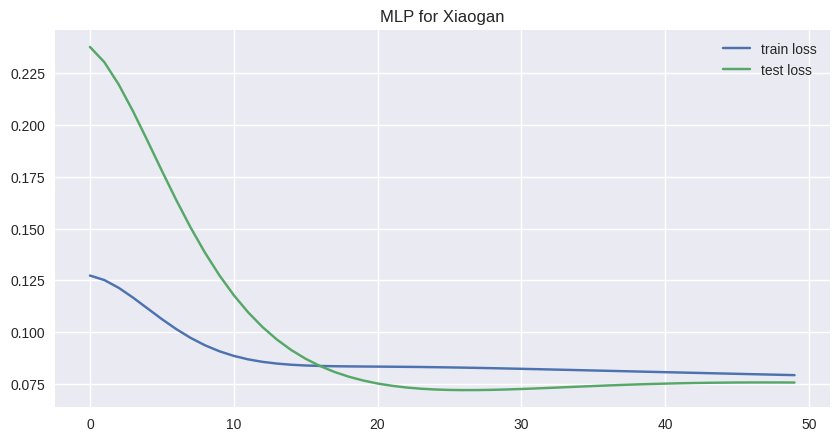

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.248635 Test loss: 0.260967
Training took 0.7483360767364502s!


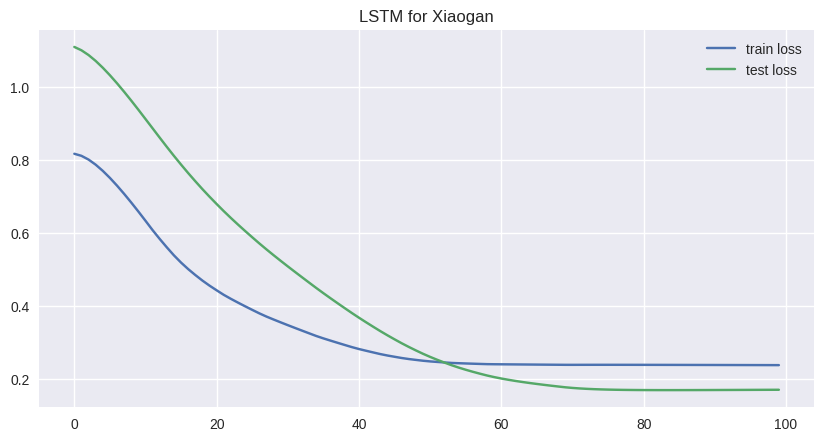

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.087009 Test loss: 0.096828
Training took 0.7433633804321289s!


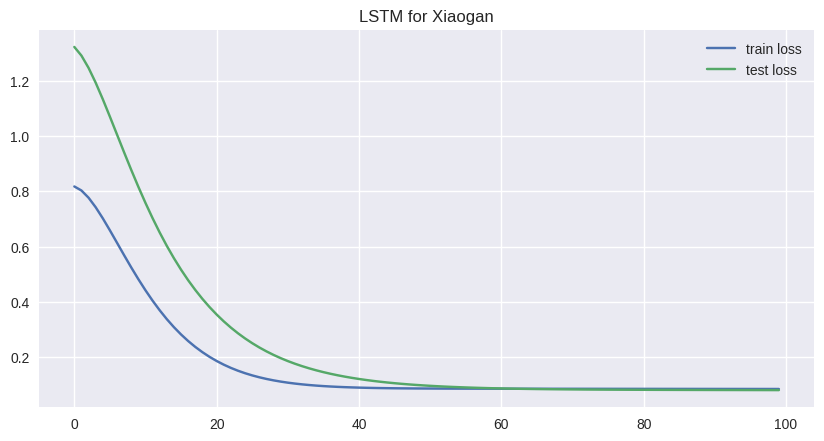

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.237187 Test loss: 0.155802
Training took 0.8133103847503662s!


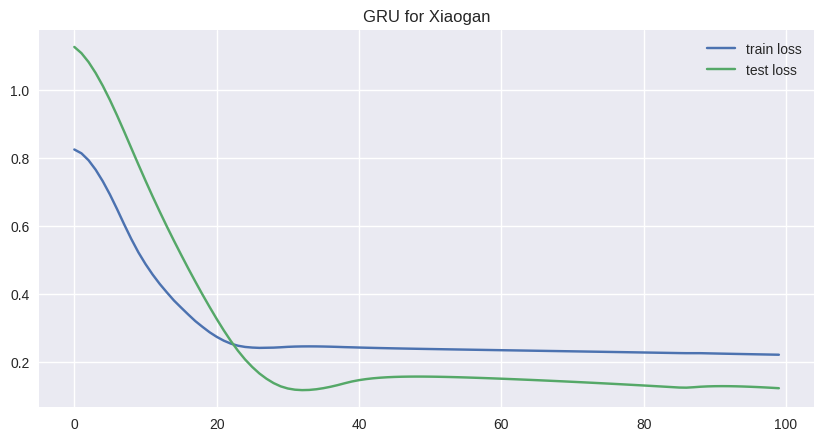

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.084792 Test loss: 0.082474
Training took 0.7858588695526123s!


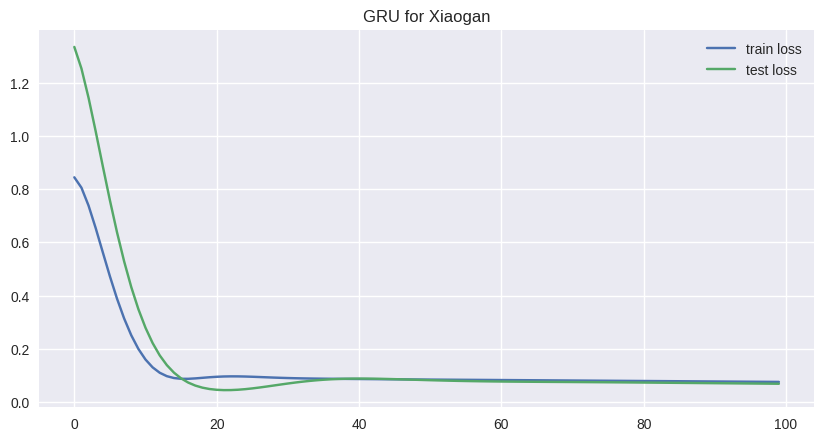

(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.598812 Test loss: 0.951513
Training took 0.3156318664550781s!


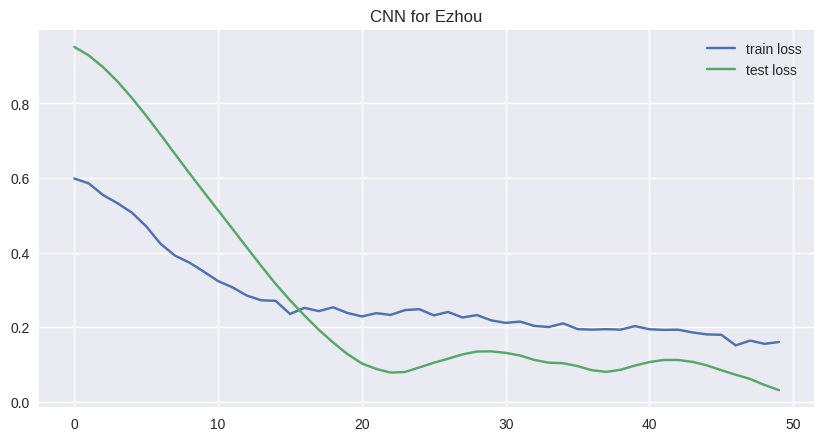

Epoch: 0/50  Loss: 0.477978 Test loss: 0.915177
Training took 0.3178842067718506s!


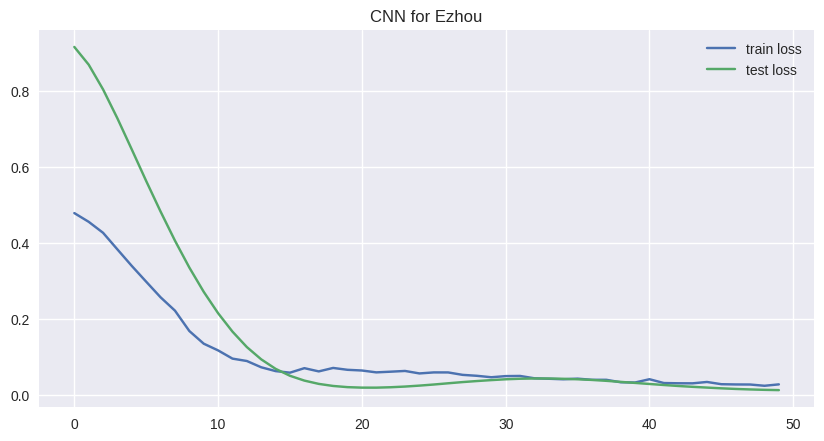

Epoch: 0/50  Loss: 0.320728 Test loss: 0.477133
Training took 0.11481285095214844s!


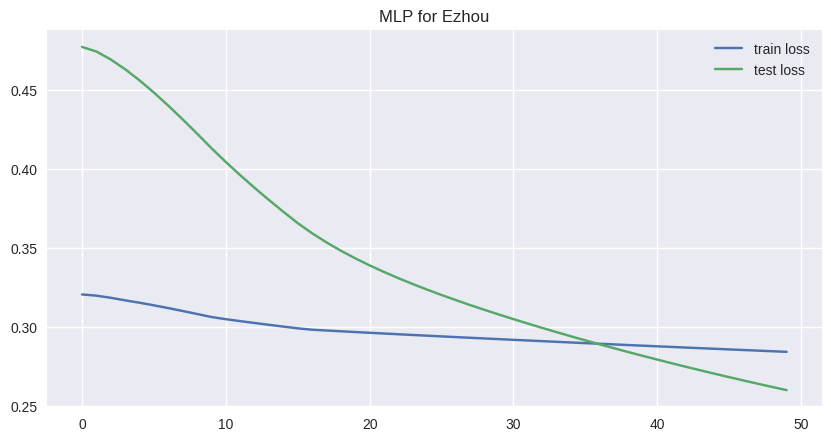

Epoch: 0/50  Loss: 0.162362 Test loss: 0.348436
Training took 0.12037277221679688s!


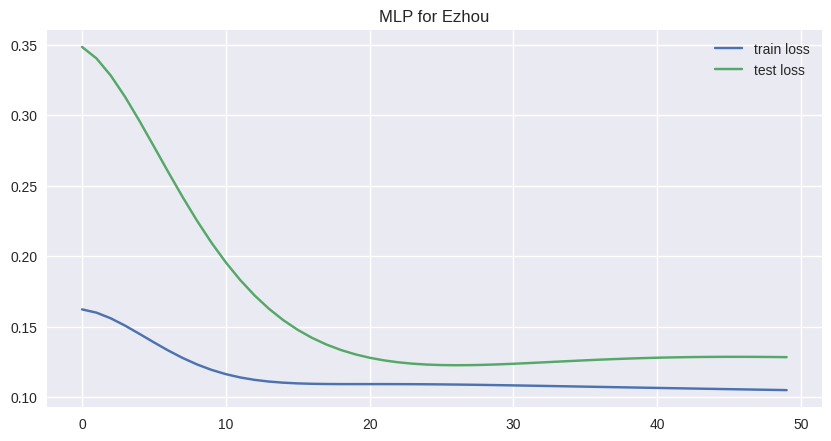

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.314899 Test loss: 0.442742
Training took 0.7801206111907959s!


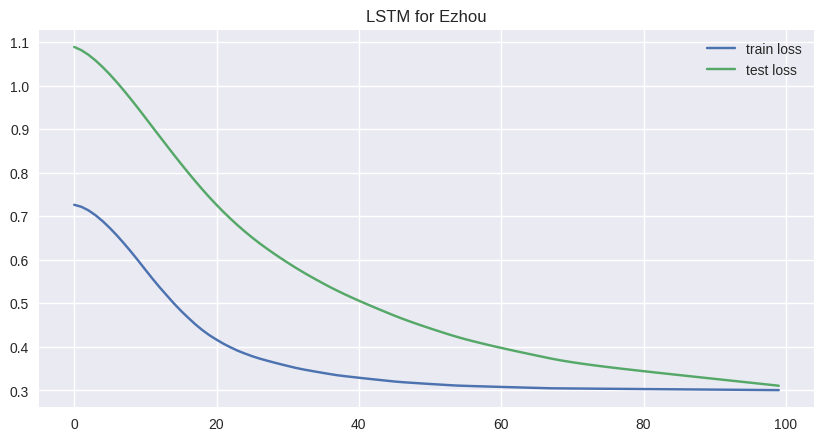

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.110234 Test loss: 0.152668
Training took 0.74092698097229s!


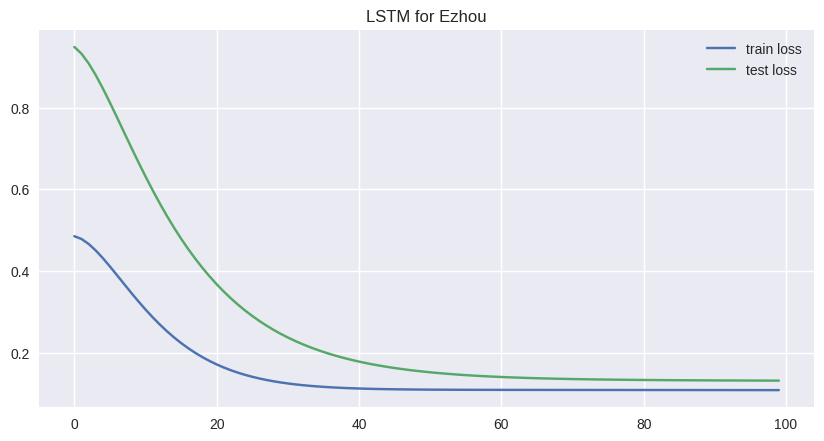

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.285300 Test loss: 0.216925
Training took 0.7904539108276367s!


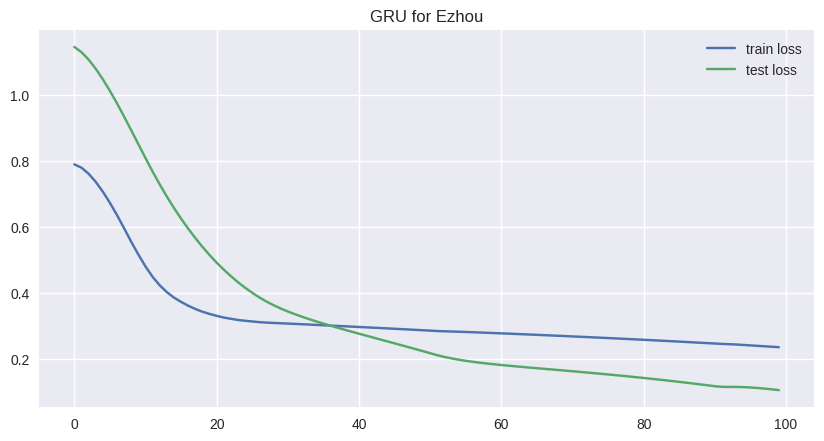

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.078460 Test loss: 0.080132
Training took 0.8059511184692383s!


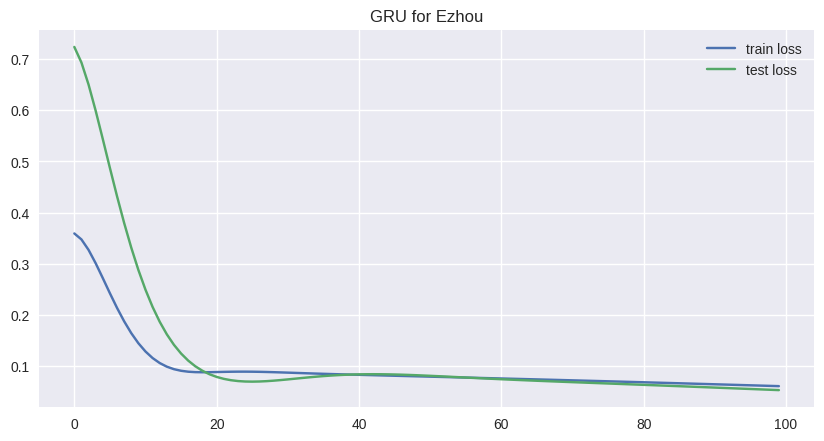

(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.785963 Test loss: 1.030124
Training took 0.33861422538757324s!


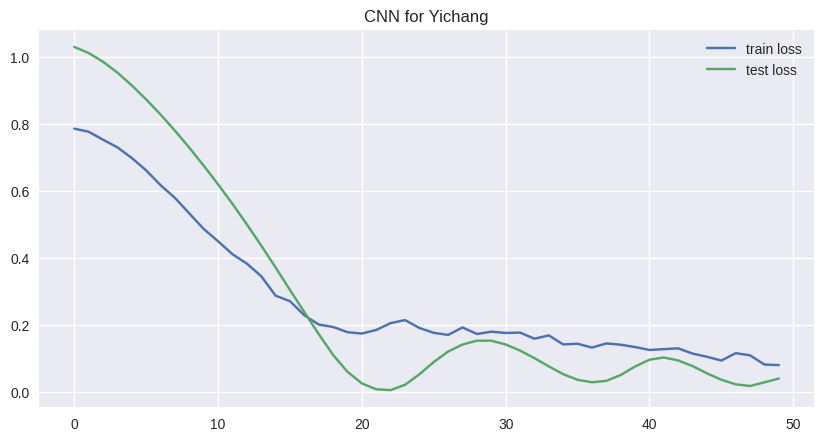

Epoch: 0/50  Loss: 0.566671 Test loss: 0.883043
Training took 0.3571178913116455s!


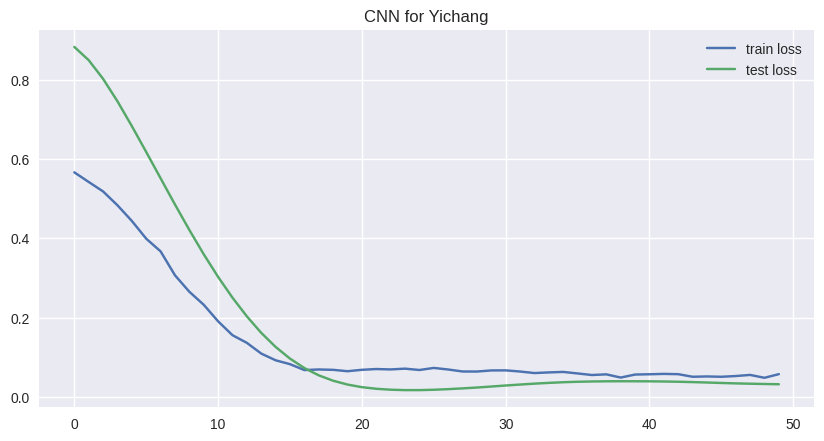

Epoch: 0/50  Loss: 0.266218 Test loss: 0.328334
Training took 0.11576366424560547s!


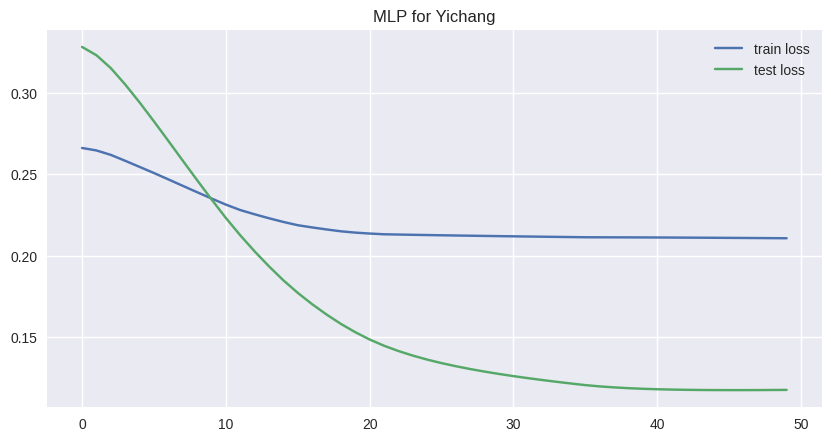

Epoch: 0/50  Loss: 0.104767 Test loss: 0.154744
Training took 0.11080741882324219s!


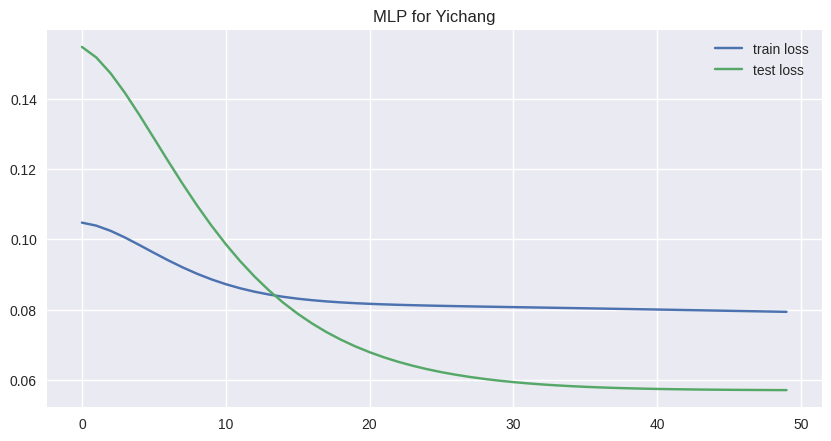

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.218063 Test loss: 0.151572
Training took 0.7501058578491211s!


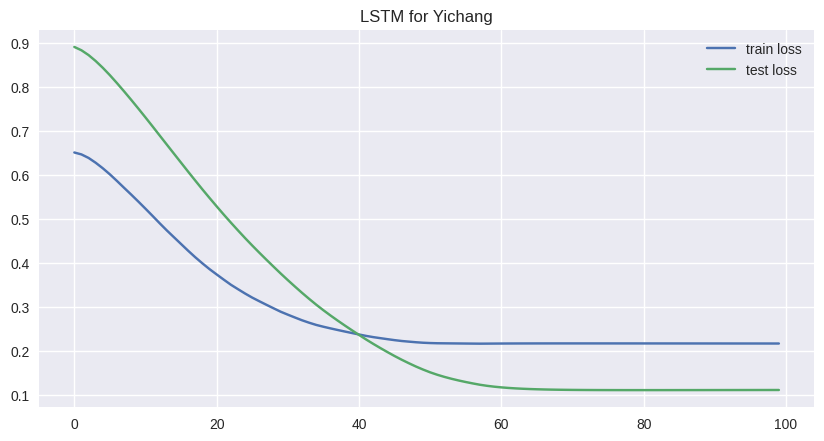

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.078331 Test loss: 0.056873
Training took 0.7375288009643555s!


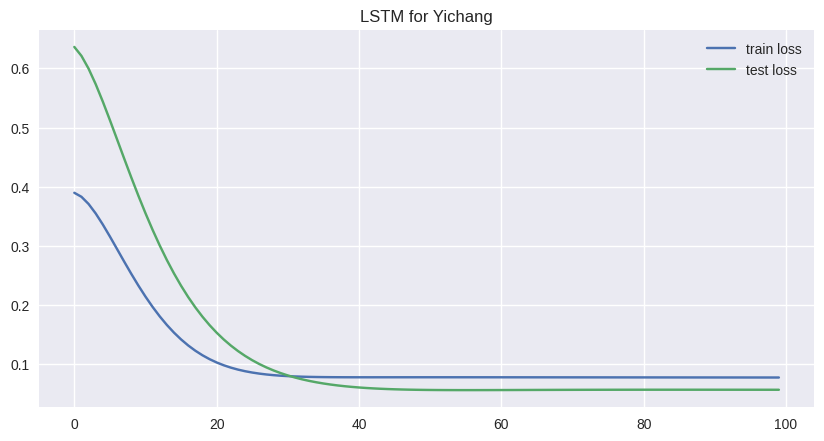

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.186287 Test loss: 0.069664
Training took 0.8230187892913818s!


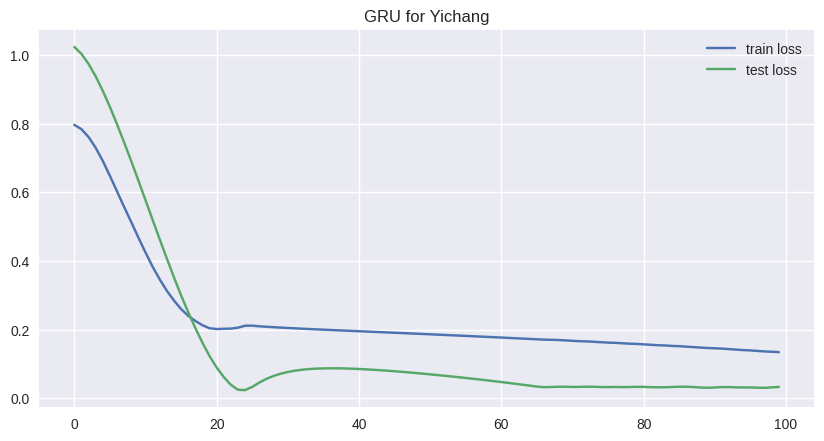

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.055253 Test loss: 0.033041
Training took 0.83392333984375s!


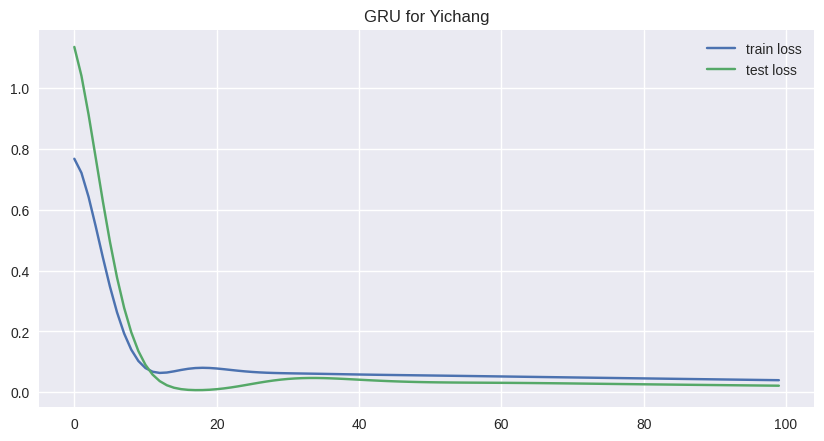

(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.841313 Test loss: 0.982280
Training took 0.3091464042663574s!


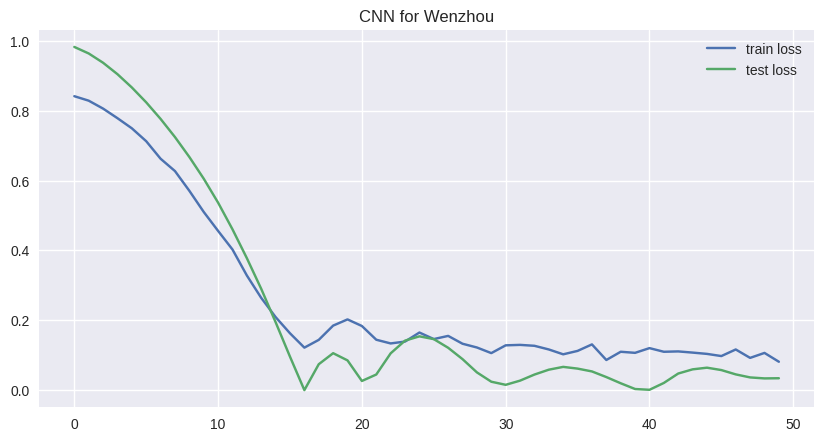

Epoch: 0/50  Loss: 0.768495 Test loss: 0.992077
Training took 0.34394073486328125s!


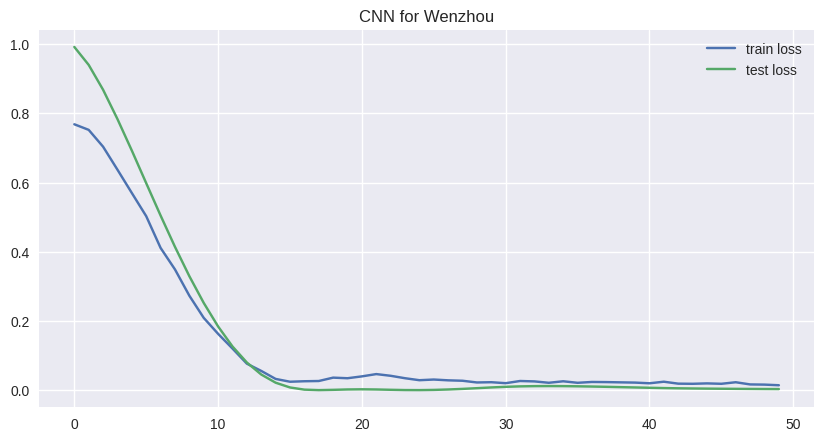

Epoch: 0/50  Loss: 0.362465 Test loss: 0.465953
Training took 0.12746620178222656s!


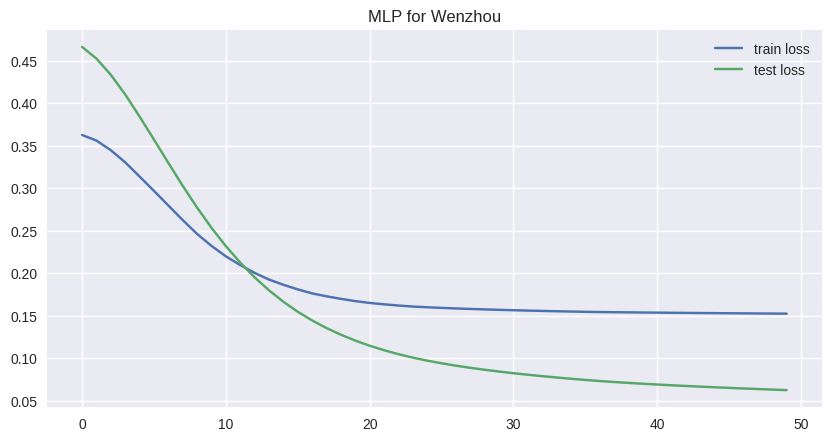

Epoch: 0/50  Loss: 0.123906 Test loss: 0.177088
Training took 0.11725258827209473s!


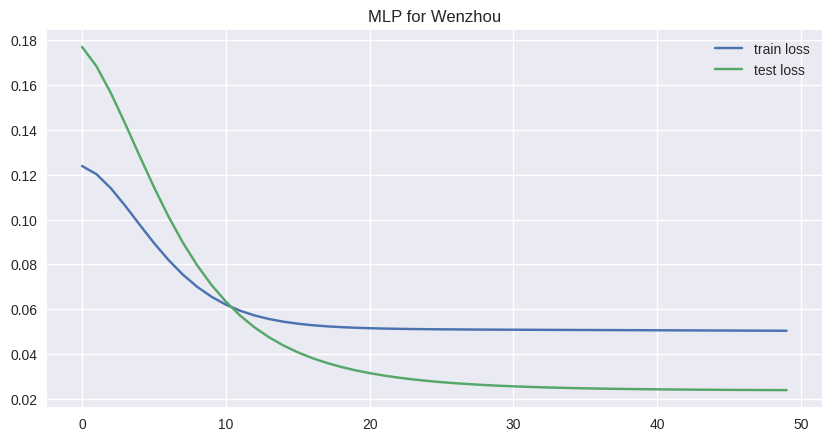

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.147782 Test loss: 0.009449
Training took 0.7331075668334961s!


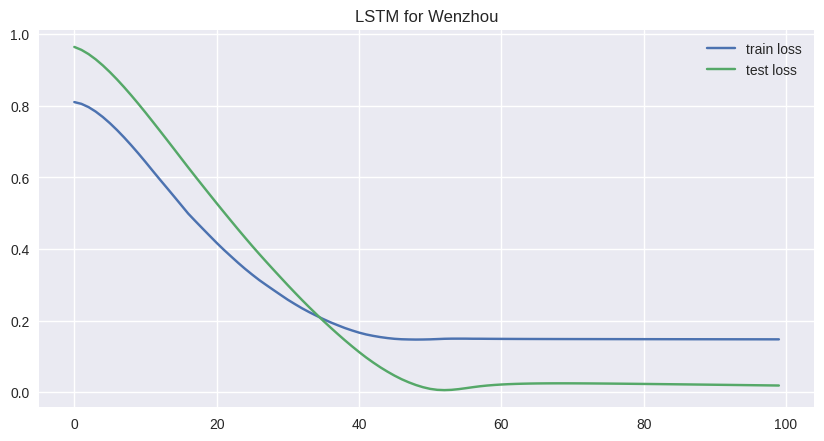

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.048955 Test loss: 0.019633
Training took 0.8824517726898193s!


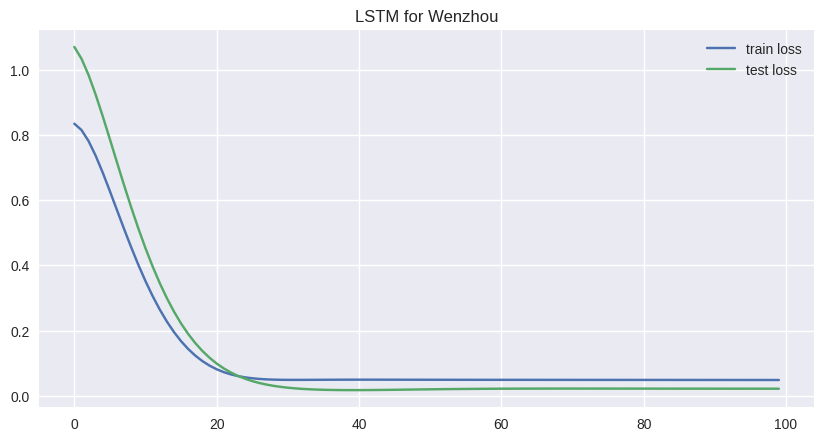

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.129533 Test loss: 0.009212
Training took 0.8185515403747559s!


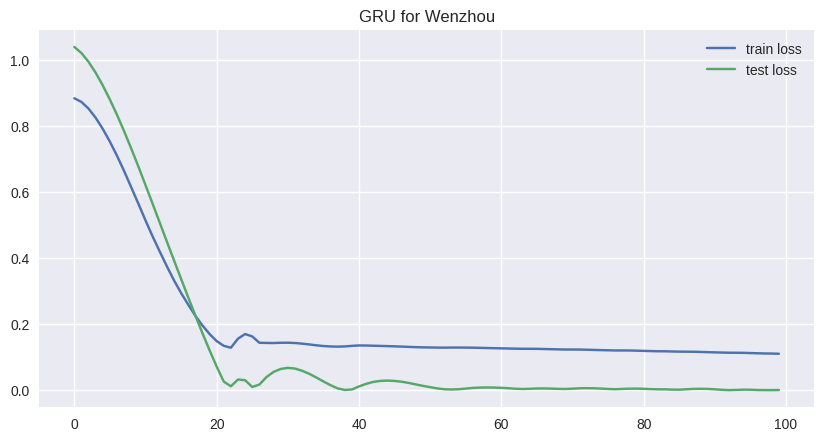

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.042994 Test loss: 0.017186
Training took 0.8329951763153076s!


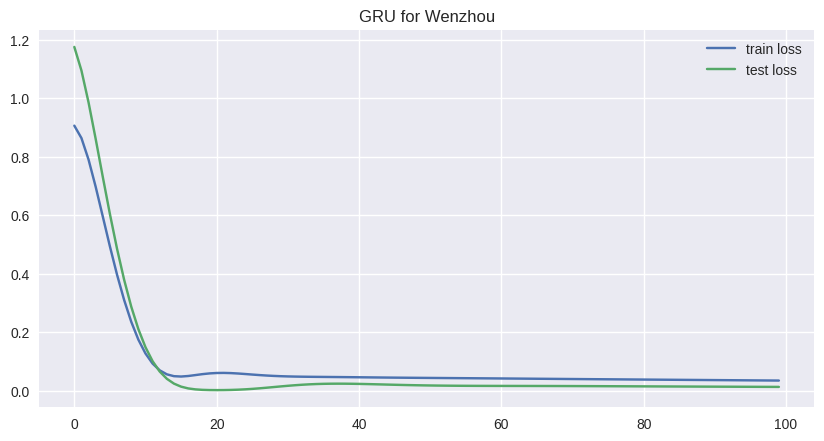

(26, 5, 1)
(26, 5, 1) (26, 1)
Epoch: 0/50  Loss: 0.738323 Test loss: 0.924706
Training took 0.3307068347930908s!


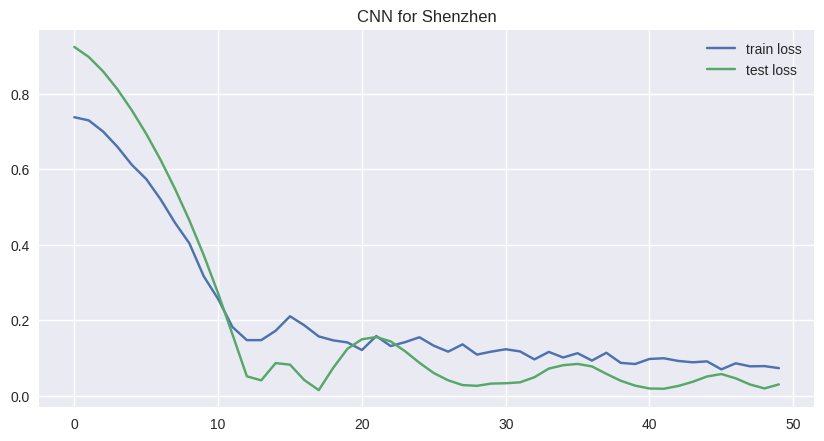

Epoch: 0/50  Loss: 0.614816 Test loss: 0.851823
Training took 0.36199402809143066s!


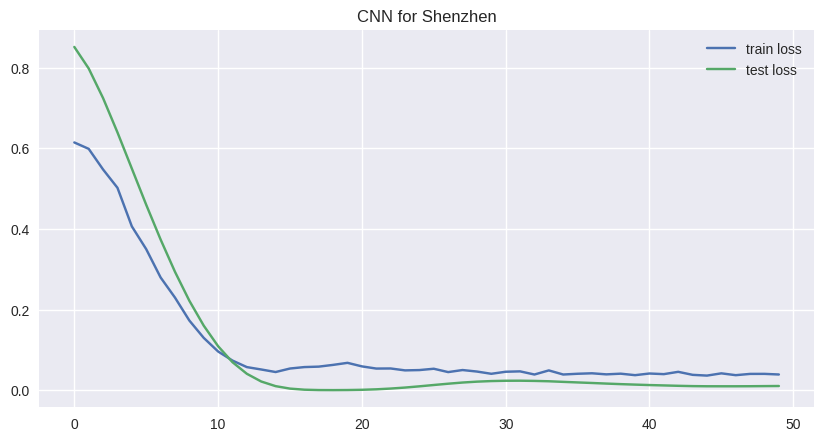

Epoch: 0/50  Loss: 0.341226 Test loss: 0.433023
Training took 0.12125563621520996s!


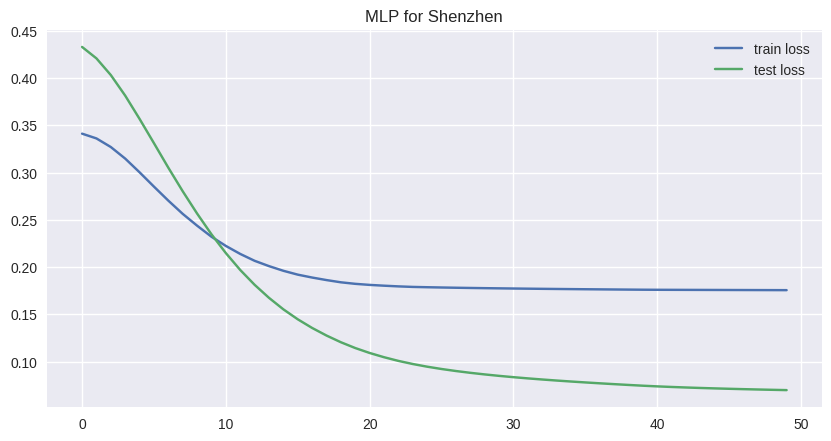

Epoch: 0/50  Loss: 0.260546 Test loss: 0.386077
Training took 0.1216278076171875s!


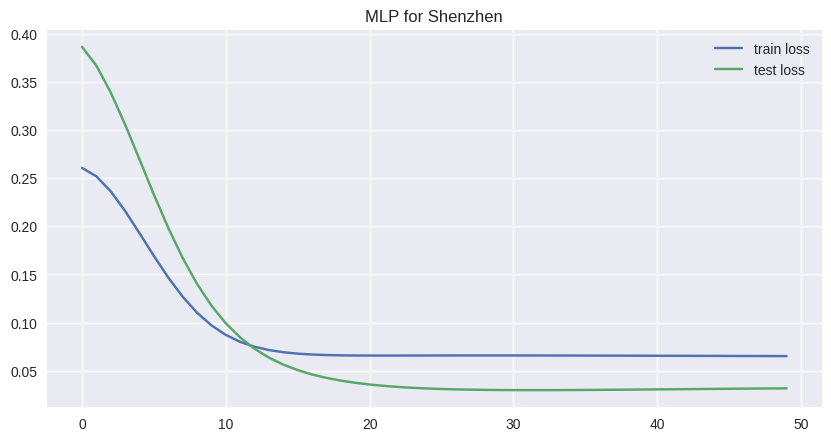

1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.184081 Test loss: 0.101897
Training took 0.7822132110595703s!


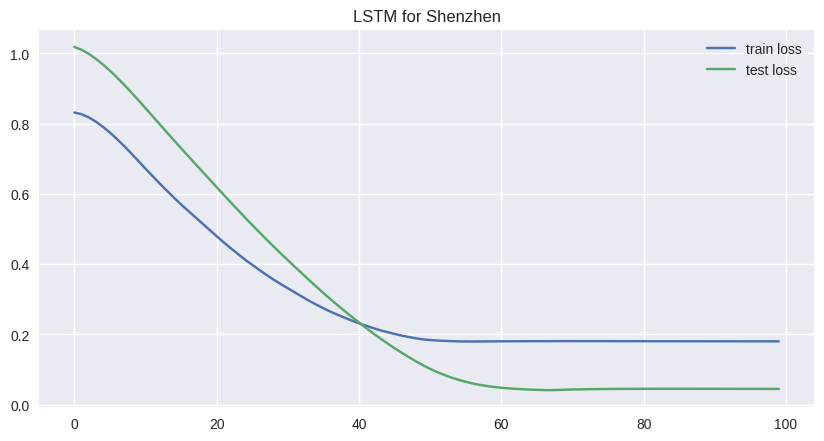

1
1
LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=80, out_features=1, bias=True)
)
Epoch: 50/100  Loss: 0.070852 Test loss: 0.048136
Training took 0.8736915588378906s!


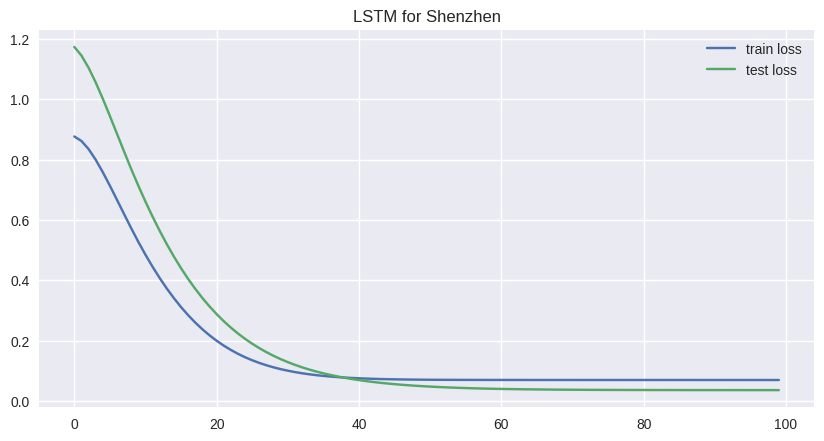

1
GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.156059 Test loss: 0.038983
Training took 0.8672006130218506s!


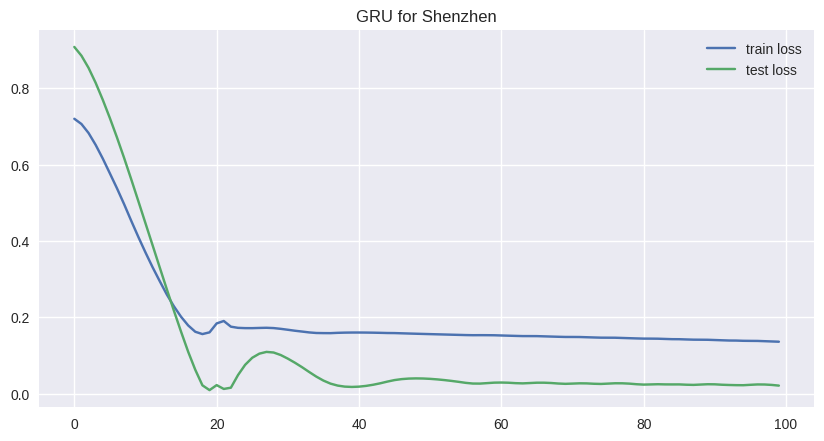

GRUNet(
  (gru): GRU(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=80, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch: 50/100  Loss: 0.062022 Test loss: 0.031175
Training took 0.8546738624572754s!


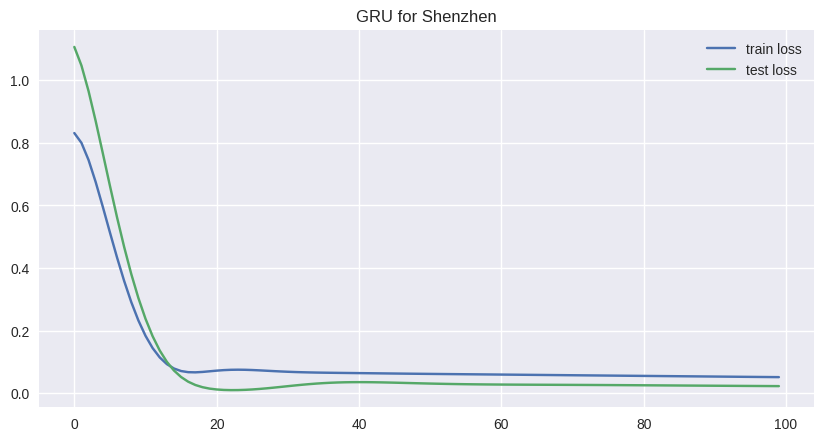

In [ ]:
column_names = ["State","Model","MAE"]
MAE_loss_df = pd.DataFrame(columns = column_names)
column_names = ["State","Model","RMSE"]
RMSE_loss_df= pd.DataFrame(columns = column_names)
MAE_loss_list=[]
RMSE_loss_list=[]
Shortlisted_States={'Wuhan':['Wu_t'],'Huanggang':['H_t'],'Xiaogan':['X_t'],'Ezhou':['E_t'],'Yichang':['Y_t'],'Wenzhou':['We_t'],'Shenzhen':['S_t']}

for state,feature in Shortlisted_States.items():
  best_models=[]
  time_step=5
  Number_of_feature=1
  multi_feature=True
  max_epochs=50
  train_loader, test_loader, scaler = data_preparation(dataset[feature], scaling_range=(0,1),time_step=time_step,multi_feature=multi_feature, response_variable_index=0,data_split_ratio=0.65)
  #CNN model with L1 loss
  best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-3,criterion=nn.L1Loss(),max_epochs=max_epochs)
  best_models.append([state,'CNN',best_model,'L1Loss'])

  #CNN model with MSE loss
  best_model=Call_CNN_model(state,dataset=(train_loader, test_loader), lr=1e-3,criterion=nn.MSELoss(),max_epochs=max_epochs)
  best_models.append([state,'CNN',best_model,'MSELoss'])

  input_dim=Number_of_feature*time_step
  hidden_dim=16
  output_dim=1
  # MLP model with L1 loss
  best_model=Call_MLP_model(state, input_dim, hidden_dim,output_dim, dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.L1Loss(),max_epochs=max_epochs)
  best_models.append([state,'MLP',best_model,'L1Loss'])

  # MLP model with MSE loss
  best_model=Call_MLP_model(state,input_dim, hidden_dim,output_dim,dataset=(train_loader, test_loader), lr=1e-2,criterion=nn.MSELoss(),max_epochs=max_epochs)
  best_models.append([state,'MLP',best_model,'MSELoss'])

  if multi_feature:
    input_dim=Number_of_feature
  else:
    input_dim=1
  hidden_dim=16
  output_dim=1 
  num_layers=2
  max_epochs=100
  #LSTM model with L1 loss 
  best_model=Call_LSTM_model(state, input_dim, hidden_dim, output_dim, num_layers, dataset=(train_loader, test_loader), lr=1e-3,criterion=nn.L1Loss(),max_epochs=max_epochs,seq_length=time_step)
  best_models.append([state,'LSTM',best_model,'L1Loss'])

  #LSTM model with MSE loss 
  best_model=Call_LSTM_model(state, input_dim, hidden_dim, output_dim, num_layers, dataset=(train_loader, test_loader), lr=1e-3,criterion=nn.MSELoss(),max_epochs=max_epochs,seq_length=time_step)
  best_models.append([state,'LSTM',best_model,'MSELoss'])
  hidden_dim=16
  output_dim=1 
  num_layers=2
  max_epochs=100
  #GRUnet model with L1 loss 
  best_model=Call_GRUNet_model(state, input_dim, hidden_dim, output_dim, num_layers, dataset=(train_loader, test_loader), lr=1e-3,criterion=nn.L1Loss(),max_epochs=max_epochs,seq_length=time_step)
  best_models.append([state,'GRU',best_model,'L1Loss'])

  #GRUnet model with MSE loss 
  best_model=Call_GRUNet_model(state, input_dim, hidden_dim, output_dim, num_layers, dataset=(train_loader, test_loader), lr=1e-3,criterion=nn.MSELoss(),max_epochs=max_epochs,seq_length=time_step)
  best_models.append([state,'GRU',best_model,'MSELoss'])



  for value in best_models:
    mae_dict={}
    rmse_dict={}
    mae_dict["State"]=value[0]
    rmse_dict["State"]=value[0]
    mae_dict["Model"]=value[1]
    rmse_dict["Model"]=value[1]
    predictions=predict(value[2], test_loader).detach().numpy()
    target=get_actual_values(value[2], test_loader).detach().numpy()
    predictions = scaler.inverse_transform(predictions)
    target = scaler.inverse_transform(target)
    if value[3]=='L1Loss':
      mae=mean_absolute_error(target,predictions)
      mae_dict["MAE"]=mae
      MAE_loss_list.append(mae_dict)
    else:
      mse=mean_squared_error(target,predictions)
      rmse=math.sqrt(mse)
      rmse_dict["RMSE"]=rmse
      RMSE_loss_list.append(rmse_dict)

In [ ]:

df_mae=MAE_loss_df.append(MAE_loss_list)
df_rmse=RMSE_loss_df.append(RMSE_loss_list)

In [ ]:
df_mae

,State,Model,MAE
0,Wuhan,CNN,1051.982910
1,Wuhan,MLP,14764.286133
2,Wuhan,LSTM,23905.150391
3,Wuhan,GRU,1056.480957
4,Huanggang,CNN,226.445648
5,Huanggang,MLP,347.056824
6,Huanggang,LSTM,168.718445
7,Huanggang,GRU,42.702515
8,Xiaogan,CNN,272.555664
9,Xiaogan,MLP,576.016357


In [ ]:
df_rmse

,State,Model,RMSE
0,Wuhan,CNN,4370.446659
1,Wuhan,MLP,19543.199329
2,Wuhan,LSTM,20981.707080
3,Wuhan,GRU,18174.661923
4,Huanggang,CNN,156.884362
5,Huanggang,MLP,675.029097
6,Huanggang,LSTM,712.414666
7,Huanggang,GRU,602.698022
8,Xiaogan,CNN,268.711276
9,Xiaogan,MLP,961.691381


In [ ]:
lstm=list(df_mae[df_mae['Model']=='LSTM']['MAE'])
cnn=list(df_mae[df_mae['Model']=='CNN']['MAE'])
mlp=list(df_mae[df_mae['Model']=='MLP']['MAE'])
gru=df_mae[df_mae['Model']=='GRU']['MAE']
lstm=[*lstm,lstm[0]]
cnn=[*cnn,cnn[0]]
lstm

[23905.150390625,
 168.71844482421875,
 598.1925048828125,
 432.42864990234375,
 103.67208862304688,
 9.461456298828125,
 18.096538543701172,
 23905.150390625]

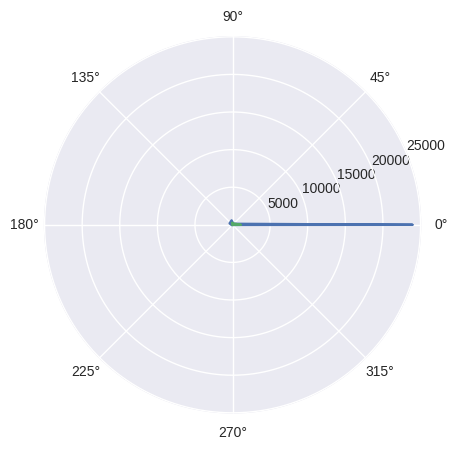

In [ ]:

N=len(lstm)-1
angle=[n/float(N)*2*3.14 for n in range(N)]
angle+=angle[:1]
plt.polar(angle,lstm)
plt.polar(angle,cnn)
plt.xticks

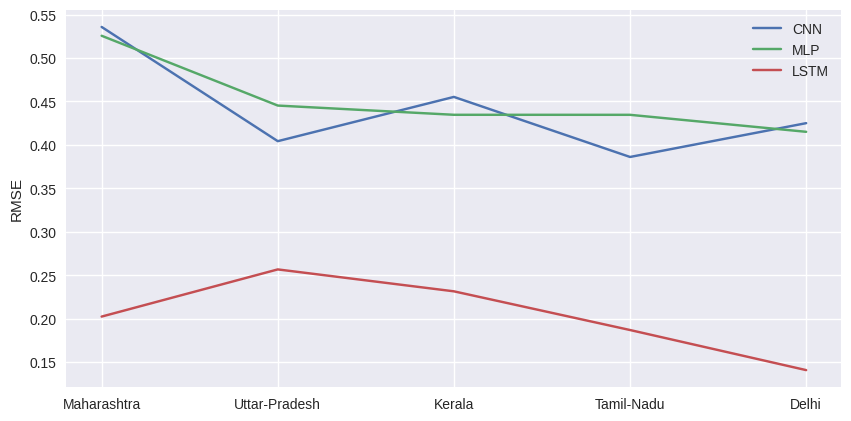

In [ ]:
CNN = [0.535748, 0.404247, 0.455198, 0.386062, 0.424986]
MLP = [0.525599, 0.445242, 0.434613, 0.434582, 0.415023]
LSTM = [0.202314, 0.256623, 0.231397, 0.186853, 0.140691] 
categories = ['Maharashtra','Uttar-Pradesh','Kerala','Tamil-Nadu','Delhi']
plt.plot(categories, CNN, label='CNN')
plt.plot(categories, MLP, label='MLP')
plt.plot(categories, LSTM, label='LSTM')
plt.legend()
plt.ylabel('RMSE')
plt.show()

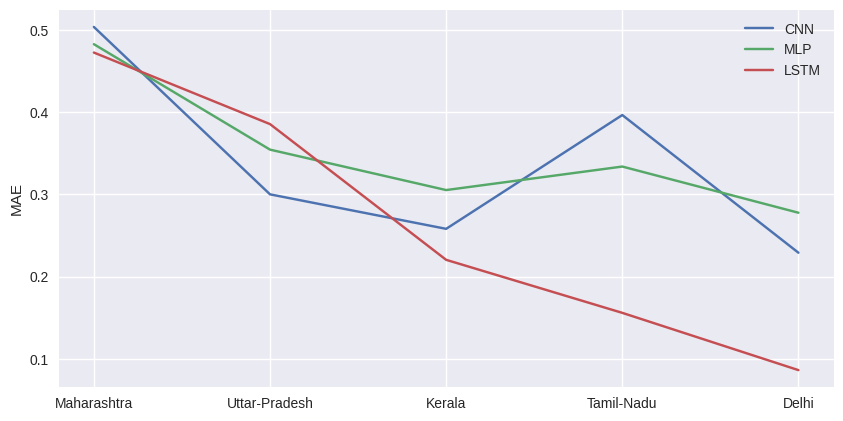

In [ ]:
CNN = [0.503458, 0.299944, 0.258004, 0.396357, 0.228982]
MLP = [0.482482, 0.354295, 0.305145, 0.333734, 0.277583]
LSTM = [0.472320, 0.385332, 0.220330, 0.155872, 0.086257]
categories = ['Maharashtra','Uttar-Pradesh','Kerala','Tamil-Nadu','Delhi']
plt.plot(categories, CNN, label='CNN')
plt.plot(categories, MLP, label='MLP')
plt.plot(categories, LSTM, label='LSTM')
plt.legend()
plt.ylabel('MAE')
plt.show()

In [ ]:
if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

    


# save images as a gif    
imageio.mimsave('./curve_2_model_3_batch.gif', my_images, fps=12)

NameError: ignored

In [ ]:
import numpy as np
a=np.array([[1,5],[2,6],[3,7]])

In [ ]:
a.shape